In [1]:
#Importeert benodigde functies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import seaborn as sns

In [2]:
#Importeert misdaad data uit Denver en definieerd deze data als df
df = pd.read_csv('crime.csv')

In [3]:
#Verkeersongevallen/verkeersovertredingen laten we weg.
df = df[df.IS_CRIME != 0]

In [4]:
#Data Understanding: Eerste indruk data, bovenste 5 rijen worden met kolomnaam weergegeven.
df.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345023 entries, 0 to 466838
Data columns (total 19 columns):
INCIDENT_ID               345023 non-null int64
OFFENSE_ID                345023 non-null int64
OFFENSE_CODE              345023 non-null int64
OFFENSE_CODE_EXTENSION    345023 non-null int64
OFFENSE_TYPE_ID           345023 non-null object
OFFENSE_CATEGORY_ID       345023 non-null object
FIRST_OCCURRENCE_DATE     345023 non-null object
LAST_OCCURRENCE_DATE      146580 non-null object
REPORTED_DATE             345023 non-null object
INCIDENT_ADDRESS          314921 non-null object
GEO_X                     340979 non-null float64
GEO_Y                     340979 non-null float64
GEO_LON                   340979 non-null float64
GEO_LAT                   340979 non-null float64
DISTRICT_ID               345023 non-null int64
PRECINCT_ID               345023 non-null int64
NEIGHBORHOOD_ID           345023 non-null object
IS_CRIME                  345023 non-null int64
IS_TRAFFIC

In [6]:
#Tijdsobjecten omzetten in DateTime eenheden voor het plotten.
df['FIRST_OCCURRENCE_DATE'] = pd.to_datetime(df['FIRST_OCCURRENCE_DATE'])

In [7]:
#We gebruiken alleen de tijd van de dag, niet de datum. Van het uur maken we een extra kolom.
df['hour'] = df['FIRST_OCCURRENCE_DATE'].dt.hour
df.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,hour
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,2016-06-15 23:31:00,NaN,6/15/2016 11:31:00 PM,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0,23
1,20186000994,20186000994239900,2399,0,theft-other,larceny,2017-10-11 12:30:00,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0,12
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,2016-03-04 20:00:00,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0,20
3,201872333,201872333239900,2399,0,theft-other,larceny,2018-01-30 19:20:00,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0,19
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,2017-06-22 20:53:00,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0,20


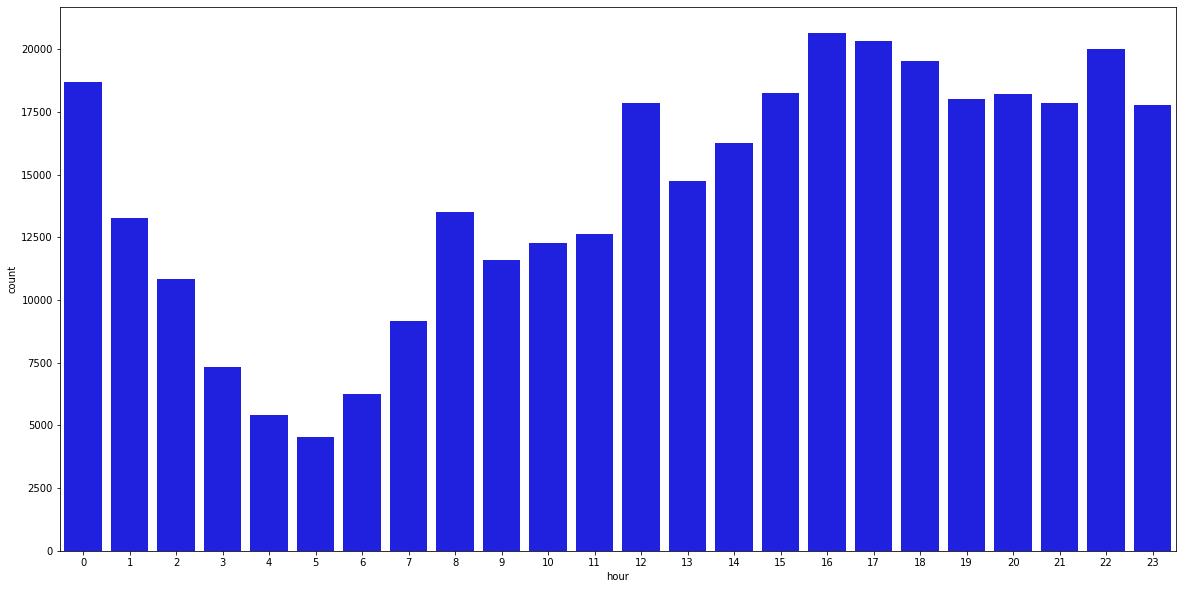

In [8]:
#Inzichtelijk maken in welk uur de meeste misdaden voorkomen.
plt.figure(figsize=(20,10))
sns.countplot(df['hour'], data=df, color='Blue')

In [9]:
#Districten uit elkaar halen om per district te visualiseren.
district1 = df.loc[df['DISTRICT_ID'] == 1]
district2 = df.loc[df['DISTRICT_ID'] == 2]
district3 = df.loc[df['DISTRICT_ID'] == 3]
district4 = df.loc[df['DISTRICT_ID'] == 4]
district5 = df.loc[df['DISTRICT_ID'] == 5]
district6 = df.loc[df['DISTRICT_ID'] == 6]
district7 = df.loc[df['DISTRICT_ID'] == 7]

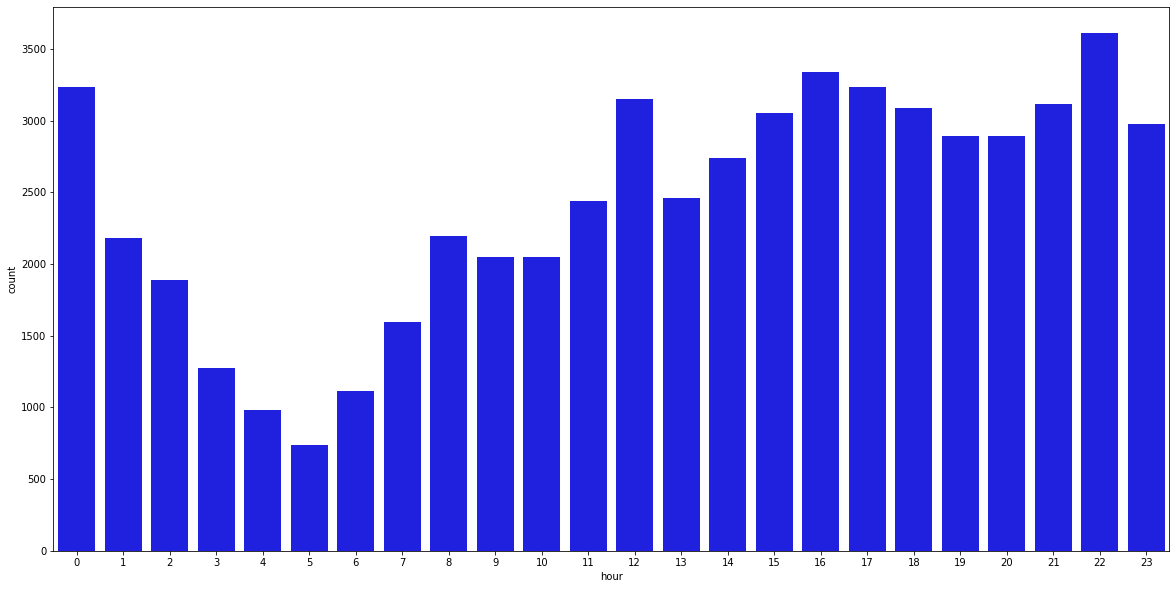

In [10]:
#Visualiseren van District 1
plt.figure(figsize=(20,10))
sns.countplot(district1['hour'], data=district1, color='Blue')

In District 1 is te zien dat de pieken liggen om 12 uur, 16 uur, 22 uur en 0 uur.

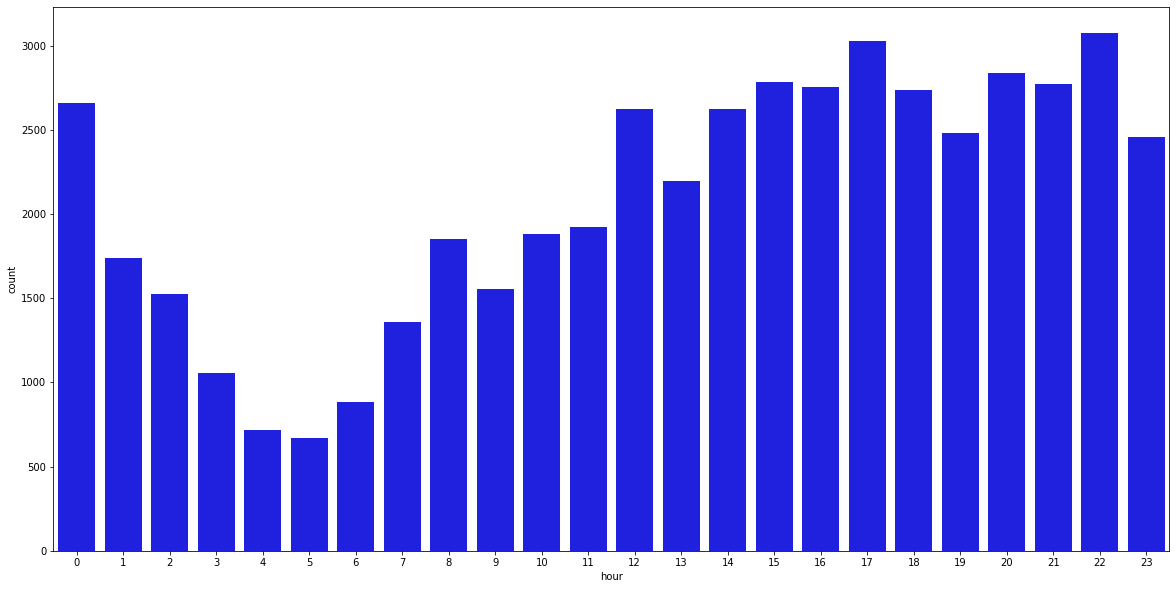

In [17]:
#Visualiseren van District 2
plt.figure(figsize=(20,10))
sns.countplot(district2['hour'], data=district2, color='Blue')

In District 2 is te zien dat de pieken liggen om 17 uur, 22 uur en 0 uur.

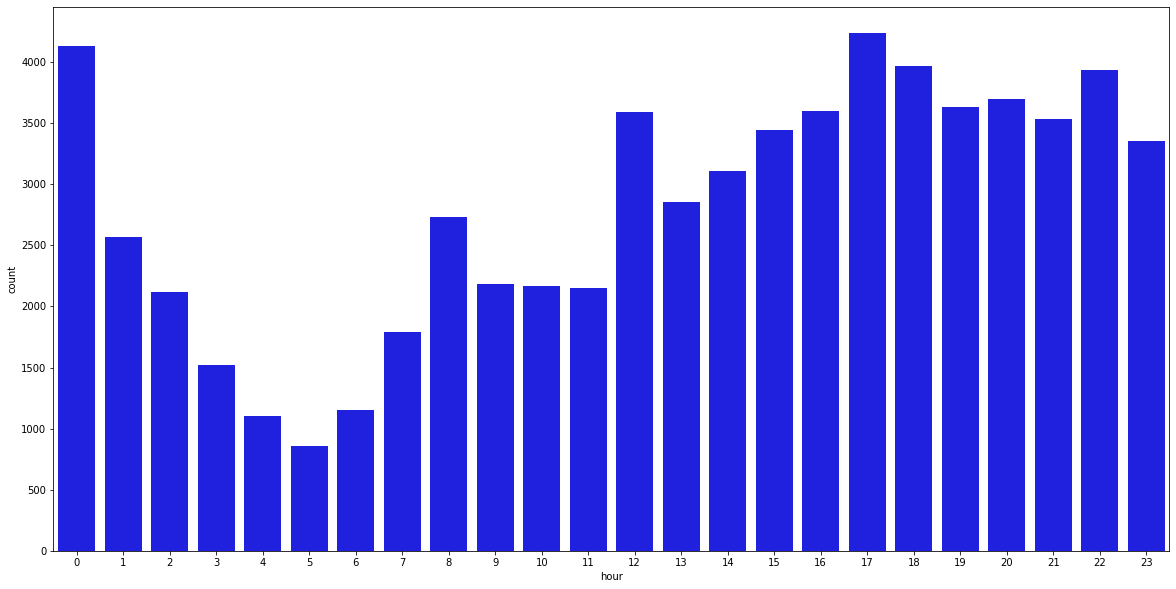

In [12]:
#Visualiseren van District 3
plt.figure(figsize=(20,10))
sns.countplot(district3['hour'], data=district3, color='Blue')

In District 3 is te zien dat de pieken liggen om 17 uur, 22 uur en 0 uur.

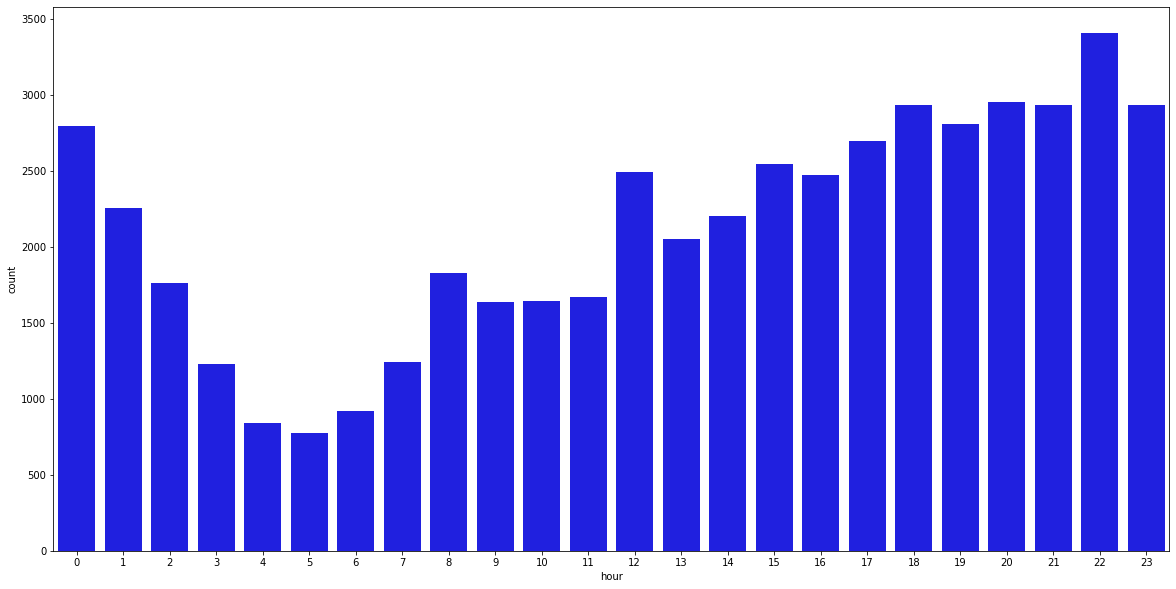

In [13]:
#Visualiseren van District 4
plt.figure(figsize=(20,10))
sns.countplot(district4['hour'], data=district4, color='Blue')

In District 4 is te zien dat de pieken liggen om 12 uur en 22 uur.

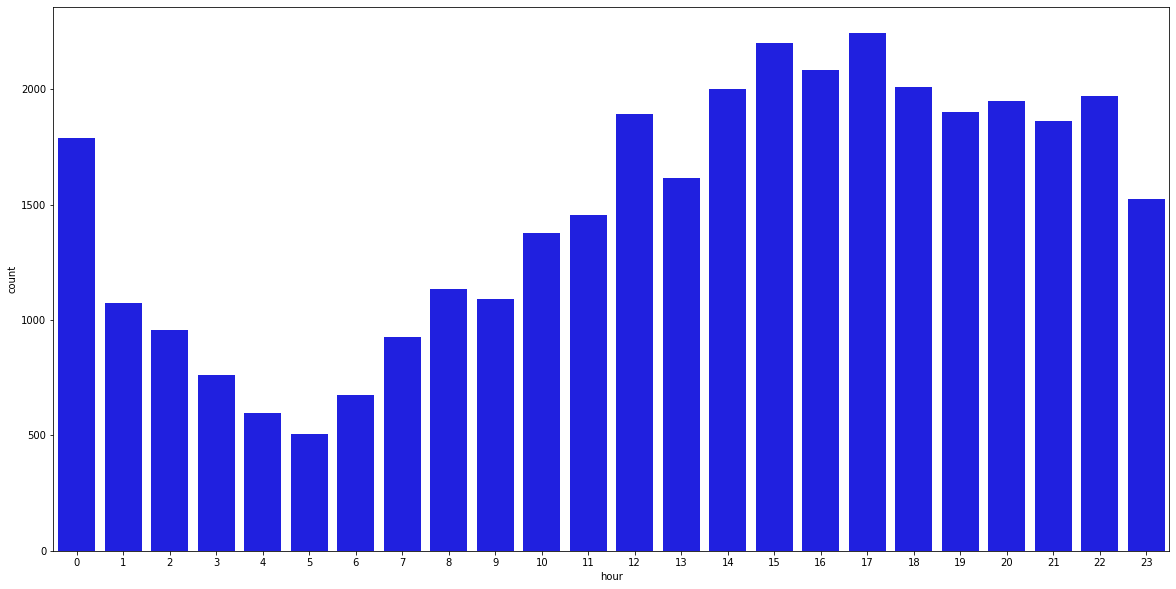

In [14]:
#Visualiseren van District 5
plt.figure(figsize=(20,10))
sns.countplot(district5['hour'], data=district5, color='Blue')

In District 5 is te zien dat de pieken liggen om 17 uur, 22 uur en 0 uur.

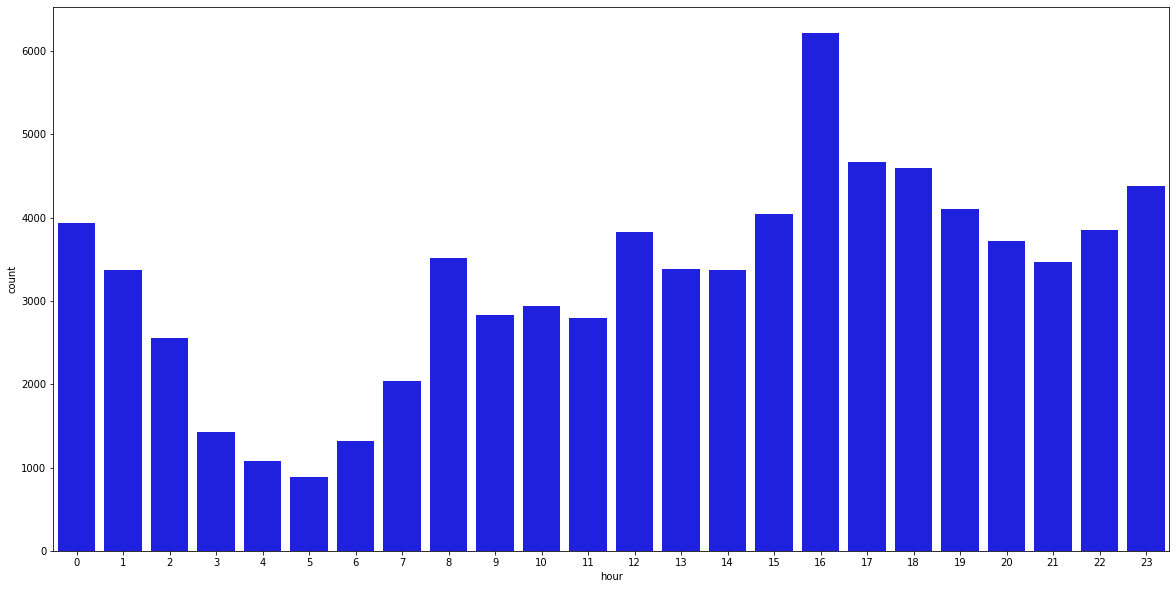

In [15]:
#Visualiseren van District 6
plt.figure(figsize=(20,10))
sns.countplot(district6['hour'], data=district6, color='Blue')

In District 6 is te zien dat de enige uitschieter op 16 uur ligt.

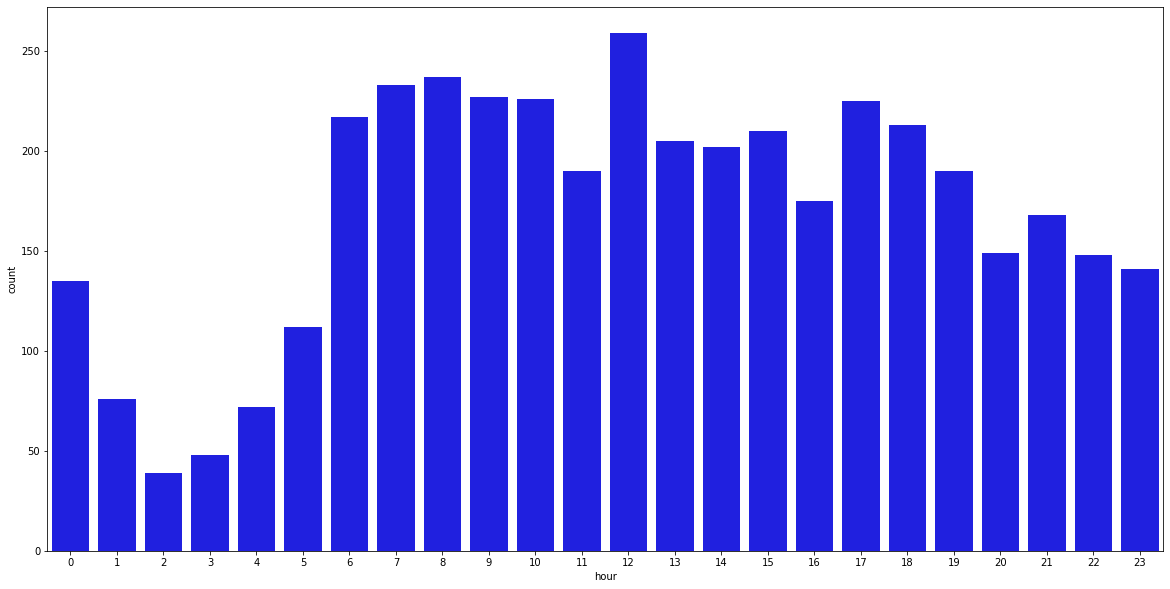

In [16]:
#Visualiseren van District 7
plt.figure(figsize=(20,10))
sns.countplot(district7['hour'], data=district7, color='Blue')

In District 7 liggen de getallen voor misdaad veel lager. Bij zulke lage getallen is het de vraag of tijdsverschillen significant genoeg zijn om te onderzoeken.

Conclusie: In de verschillende districten liggen de pieken vaak op dezelfde uren, 16/17 en 22 uur. Wat dit ons kan vertellen is dat er in deze districten duidelijke periodes zijn waar een hogere aanwezigheid van politie een groot verschil kan maken.